In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

from pulse_method.toolbox_pulse import *
from models.networks.Attention_unet import AttentionUnet
from transforms.augmentations import *
from models.layers.grid_attention import *

In [2]:
sample=np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Only_gaussian/param_fbh_gaussian_size5mm_depth10pct_thickness3mm.npz')
x=sample['data']
y=sample['mask']

x=torch.from_numpy(x).to(torch.float32)
y=torch.from_numpy(y).to(torch.uint8)

x=x.unsqueeze(0)
y=y.unsqueeze(0)

In [3]:
transforms=[
    RandomPhaseAwareSpeedChange(),
    RandomBrightnessContrast(),
    PrependFirstFrame(),
    RandomFlip3D(axes=(1,2)),
    RandomElasticTransform(),
    RandomSequenceRotation(),
    RandomCropSequence(),
    AddGaussianNoise3D(),
    NormalizeTo01()
]     

In [4]:
modification=Compose3D(transforms=transforms)
x_mod,y_mod=modification(x,y)

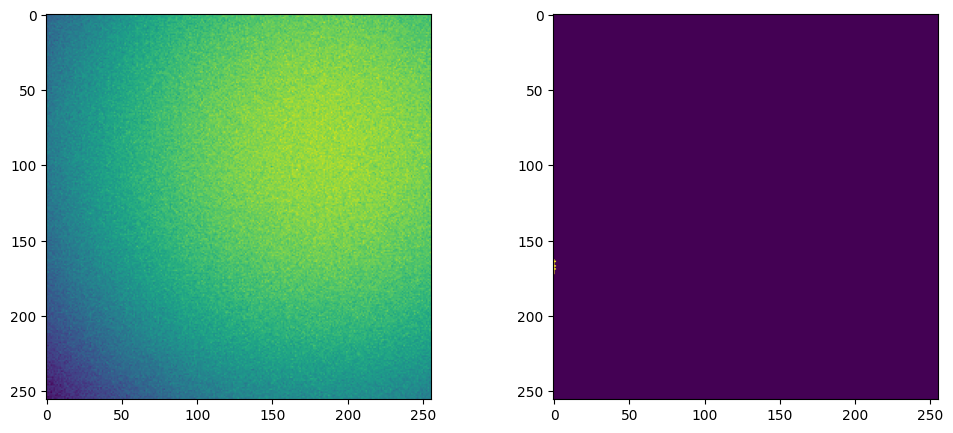

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(x_mod[0,100,:,:])
plt.subplot(1,2,2)
plt.imshow(y_mod[0,:,:])

Text(0, 0.5, 'Normalzized temperature')

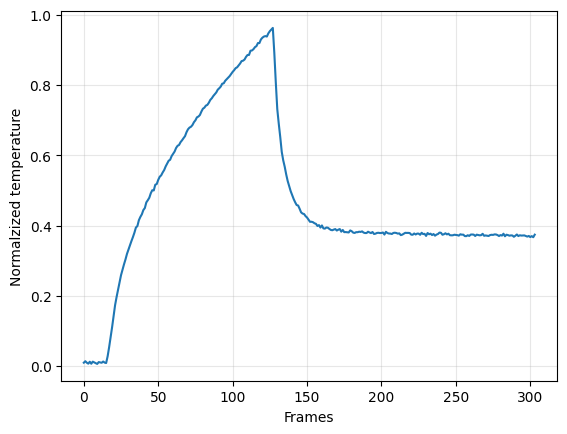

In [6]:
plt.plot(x_mod[0,:,250,250],label='Modified sample')
plt.grid(alpha=0.3)
plt.xlabel('Frames')
plt.ylabel('Normalzized temperature')

In [7]:
operator=thermograms()
x_mod_pct,_=operator.PCT_torch(x_mod.squeeze(0))
x_mod_pct=x_mod_pct.unsqueeze(0)

x_mod_tsr,reconstruction,_=operator.TSR_torch(x_mod.squeeze(0),polynomial_order=2)
x_mod_tsr=x_mod_tsr.unsqueeze(0)

x_mod_dmd,eig_dmd=operator.DMD_torch(x_mod.squeeze(0))
x_mod_dmd=x_mod_dmd.unsqueeze(0)

<h1>PCA projection<h2>

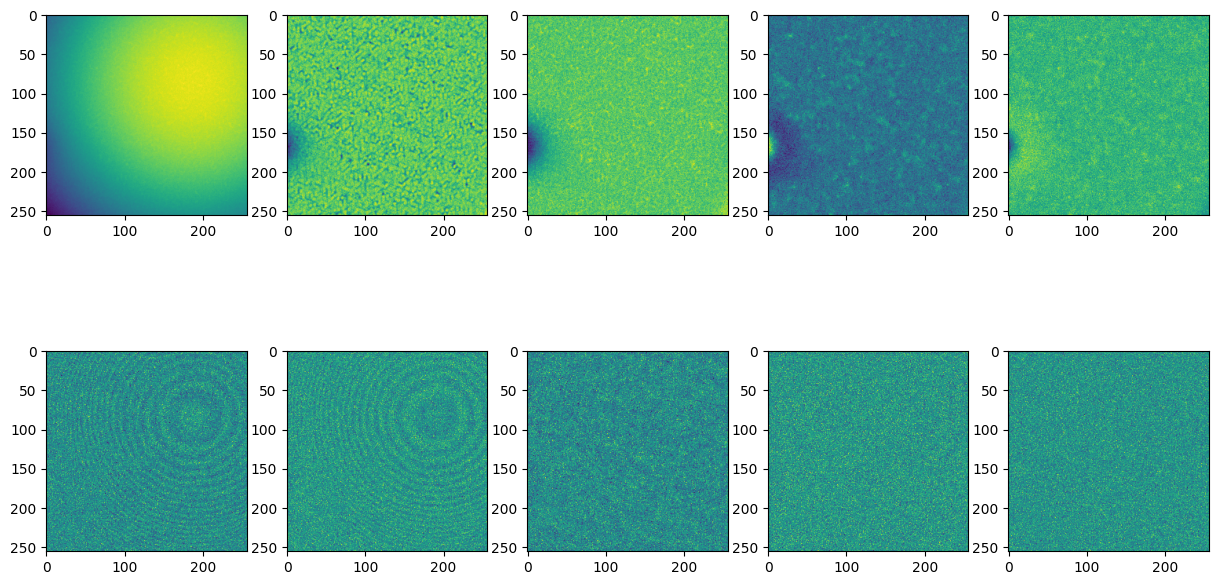

In [8]:
plt.figure(figsize=(15,8))
plt.subplot(2,5,1)
plt.imshow(x_mod_pct[0,0,:,:])
plt.subplot(2,5,2)
plt.imshow(x_mod_pct[0,1,:,:])
plt.subplot(2,5,3)
plt.imshow(x_mod_pct[0,2,:,:])
plt.subplot(2,5,4)
plt.imshow(x_mod_pct[0,3,:,:])
plt.subplot(2,5,5)
plt.imshow(x_mod_pct[0,4,:,:])
plt.subplot(2,5,6)
plt.imshow(x_mod_pct[0,5,:,:])
plt.subplot(2,5,7)
plt.imshow(x_mod_pct[0,6,:,:])
plt.subplot(2,5,8)
plt.imshow(x_mod_pct[0,7,:,:])
plt.subplot(2,5,9)
plt.imshow(x_mod_pct[0,8,:,:])
plt.subplot(2,5,10)
plt.imshow(x_mod_pct[0,9,:,:])

<h1>TSR approximation<h1>

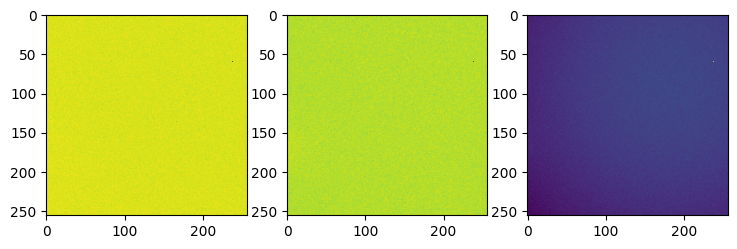

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(2,5,1)
plt.imshow(x_mod_tsr[0,0,:,:])
plt.subplot(2,5,2)
plt.imshow(x_mod_tsr[0,1,:,:])
plt.subplot(2,5,3)
plt.imshow(x_mod_tsr[0,2,:,:])
# plt.subplot(2,5,4)
# plt.imshow(x_mod_tsr[0,3,:,:])
# plt.subplot(2,5,5)
# plt.imshow(x_mod_tsr[0,4,:,:])
# plt.subplot(2,5,6)
# plt.imshow(x_mod_tsr[0,5,:,:])
# plt.subplot(2,5,7)
# plt.imshow(x_mod_tsr[0,6,:,:])
# plt.subplot(2,5,8)
# plt.imshow(x_mod_tsr[0,7,:,:])
# plt.subplot(2,5,9)
# plt.imshow(x_mod_tsr[0,8,:,:])
# plt.subplot(2,5,10)
# plt.imshow(x_mod_tsr[0,9,:,:])

<h1>DMD operator eigen values<h1>

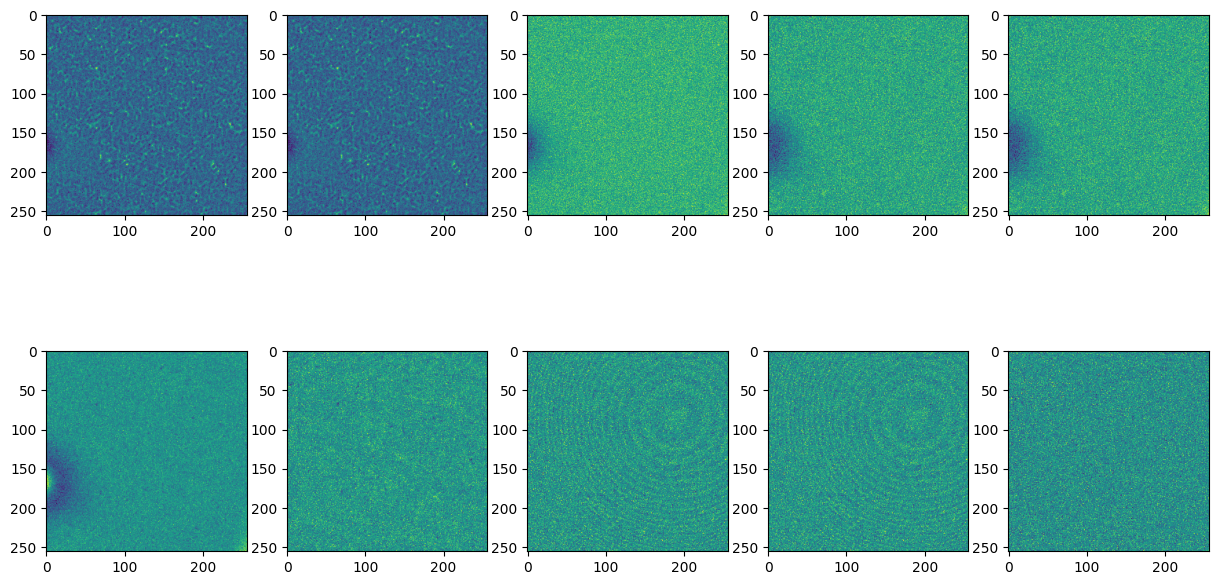

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(2,5,1)
plt.imshow(x_mod_dmd[0,0,:,:].real)
plt.subplot(2,5,2)
plt.imshow(x_mod_dmd[0,1,:,:].real)
plt.subplot(2,5,3)
plt.imshow(x_mod_dmd[0,2,:,:].real)
plt.subplot(2,5,4)
plt.imshow(x_mod_dmd[0,3,:,:].real)
plt.subplot(2,5,5)
plt.imshow(x_mod_dmd[0,4,:,:].real)
plt.subplot(2,5,6)
plt.imshow(x_mod_dmd[0,5,:,:].real)
plt.subplot(2,5,7)
plt.imshow(x_mod_dmd[0,6,:,:].real)
plt.subplot(2,5,8)
plt.imshow(x_mod_dmd[0,7,:,:].real)
plt.subplot(2,5,9)
plt.imshow(x_mod_dmd[0,8,:,:].real)
plt.subplot(2,5,10)
plt.imshow(x_mod_dmd[0,9,:,:].real)

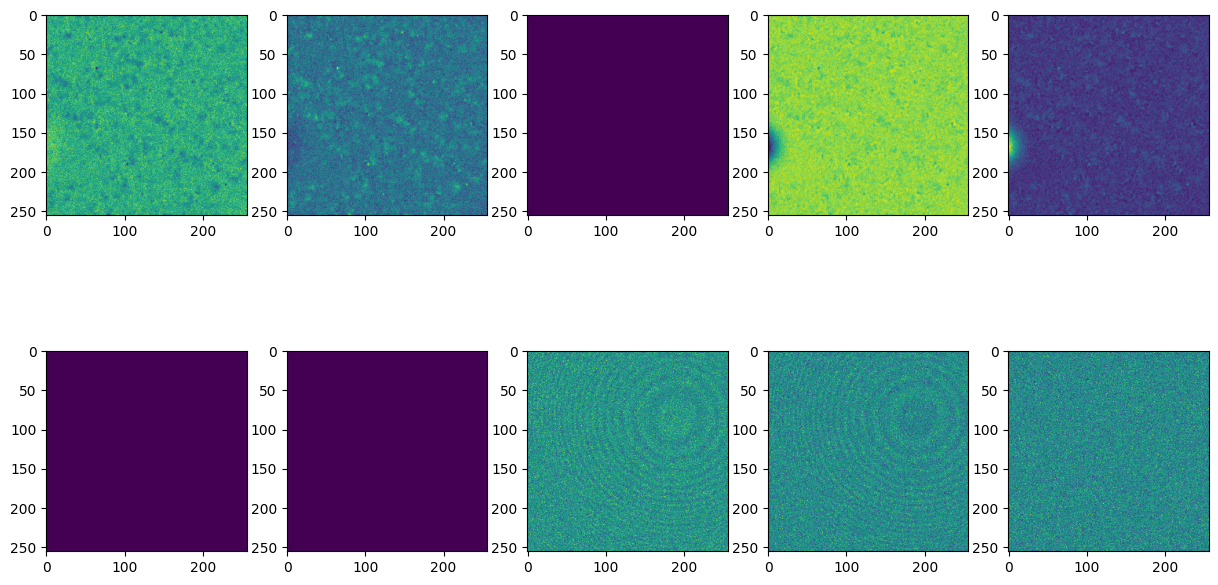

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(2,5,1)
plt.imshow(x_mod_dmd[0,0,:,:].imag)
plt.subplot(2,5,2)
plt.imshow(x_mod_dmd[0,1,:,:].imag)
plt.subplot(2,5,3)
plt.imshow(x_mod_dmd[0,2,:,:].imag)
plt.subplot(2,5,4)
plt.imshow(x_mod_dmd[0,3,:,:].imag)
plt.subplot(2,5,5)
plt.imshow(x_mod_dmd[0,4,:,:].imag)
plt.subplot(2,5,6)
plt.imshow(x_mod_dmd[0,5,:,:].imag)
plt.subplot(2,5,7)
plt.imshow(x_mod_dmd[0,6,:,:].imag)
plt.subplot(2,5,8)
plt.imshow(x_mod_dmd[0,7,:,:].imag)
plt.subplot(2,5,9)
plt.imshow(x_mod_dmd[0,8,:,:].imag)
plt.subplot(2,5,10)
plt.imshow(x_mod_dmd[0,9,:,:].imag)

In [12]:
model=AttentionUnet(n_classes=1,in_channels=1)

In [13]:
x_mod=torch.cat((x_mod_dmd.real,x_mod_dmd.imag),dim=1)
x_mod.size()

torch.Size([1, 40, 256, 256])

In [14]:
x_mod=x_mod.unsqueeze(0)
x_mod.size()

torch.Size([1, 1, 40, 256, 256])

In [15]:
x_mod=x_mod.permute(0,1,3,4,2)
x_mod.size()

torch.Size([1, 1, 256, 256, 40])

In [16]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x_mod=x_mod.to(device)

In [17]:
model=model.to(device)

In [18]:
x_mod.size()

torch.Size([1, 1, 256, 256, 40])

In [19]:
final,att4,att3,att2=model(x_mod)

In [21]:
final.requires_grad

True

In [22]:
final.size()

torch.Size([1, 1, 256, 256, 1])